In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [8]:
auto_prices.shape
auto_prices.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [34]:
import pandas as pd
import numpy as np
    
def clean_auto_data(auto_prices):
    'Function to load the auto price data set from a .csv file' 
    auto_prices = pd.read_csv('Automobile price data _Raw_.csv')
    cols = auto_prices.columns
    auto_prices.columns = [str.replace('-', '_') for str in cols]

    #Treat missing values #Remove rows with missing values, accounting for mising values coded as'?'
    cols = ['price', 'bore', 'stroke', 'horsepower', 'peak_rpm']
    for column in cols:
        auto_prices.loc[auto_prices[column] == '?', column] = np.nan
    auto_prices.dropna(axis = 0, inplace = True)

    #Transform column data type #Convert some columns to numeric values
    for column in cols:
        auto_prices[column] = pd.to_numeric(auto_prices[column])
    return auto_prices

auto_prices = clean_auto_data(auto_prices)
print(auto_prices.columns)

Index(['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration',
       'num_of_doors', 'body_style', 'drive_wheels', 'engine_location',
       'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type',
       'num_of_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'price'],
      dtype='object')


In [43]:
auto_prices.shape
auto_prices.columns
auto_prices.dtypes
auto_prices.describe()

,symboling,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,0.794872,98.896410,174.256923,65.886154,53.861538,2559.000000,127.938462,3.329385,3.250308,10.194974,103.271795,5099.487179,25.374359,30.841026,13248.015385
std,1.230612,6.132038,12.476443,2.132484,2.396778,524.715799,41.433916,0.271866,0.314115,4.062109,37.869730,468.271381,6.401382,6.829315,8056.330093
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.050000,52.000000,2145.000000,98.000000,3.150000,3.110000,8.500000,70.000000,4800.000000,19.500000,25.000000,7756.500000
50%,1.000000,97.000000,173.200000,65.400000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5100.000000,25.000000,30.000000,10245.000000
75%,2.000000,102.400000,184.050000,66.900000,55.650000,2943.500000,145.500000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,35.000000,16509.000000
max,3.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


In [50]:
#frequency_table
def freq_table(auto_prices,columns):
    for col in columns:
        print("\n"+col)
        print(auto_prices[col].value_counts())
cat_cols = ['make', 'fuel_type','aspiration', 'num_of_doors', 'body_style','drive_wheels', 'engine_location', 'engine_type', 'num_of_cylinders', 'fuel_system']
freq_table(auto_prices,cat_cols)


make
toyota           32
nissan           18
honda            13
mazda            13
mitsubishi       13
subaru           12
volkswagen       12
peugot           11
volvo            11
dodge             9
bmw               8
mercedes-benz     8
plymouth          7
audi              6
saab              6
porsche           4
jaguar            3
chevrolet         3
alfa-romero       3
isuzu             2
mercury           1
Name: make, dtype: int64

fuel_type
gas       175
diesel     20
Name: fuel_type, dtype: int64

aspiration
std      159
turbo     36
Name: aspiration, dtype: int64

num_of_doors
four    112
two      81
?         2
Name: num_of_doors, dtype: int64

body_style
sedan          94
hatchback      63
wagon          24
hardtop         8
convertible     6
Name: body_style, dtype: int64

drive_wheels
fwd    116
rwd     71
4wd      8
Name: drive_wheels, dtype: int64

engine_location
front    192
rear       3
Name: engine_location, dtype: int64

engine_type
ohc     143
ohcf     15

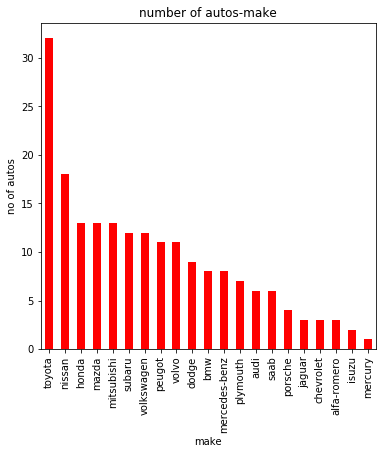

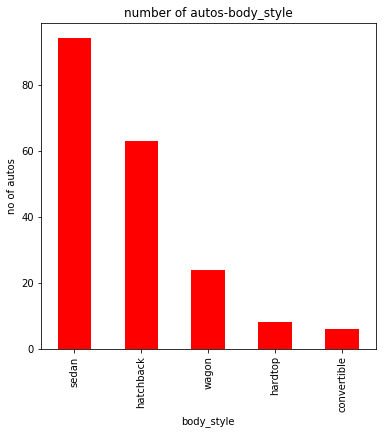

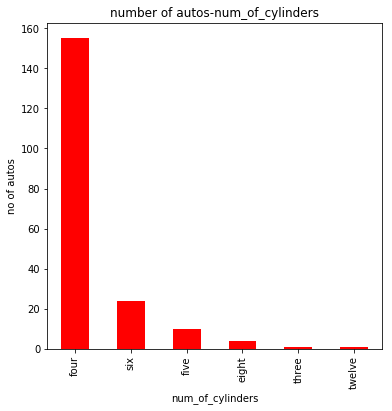

In [56]:
def plot_bars(auto_prices,cols):
    for col in cols:
        fig=plt.figure(figsize=(6,6))
        ax=fig.gca()
        counts=auto_prices[col].value_counts()
        counts.plot.bar(ax=ax,color='red')
        ax.set_title("number of autos-" +col)
        ax.set_xlabel(col)
        ax.set_ylabel("no of autos")
        plt.show
new_cols=["make","body_style","num_of_cylinders"]
plot_bars(auto_prices,new_cols)